# Imports and program variables


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics
import pandas as pd

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

from time_series_dataset_loader import TimeSeriesDatasetLoader

from sklearn.model_selection import train_test_split # to split dataset into train and test
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
/home/moutinho/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/moutinho/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/moutinho/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/moutinho/.local/lib/python3.6/site-packages/tensorflo

In [2]:
DATASET_PATH = '../src/Features/2SecSplitFeatures'

## Setting up train and test datasets

In [3]:
dataset_loader = TimeSeriesDatasetLoader(DATASET_PATH)
X, y = dataset_loader.get_dataset()

In [4]:
X = np.asarray(X)
y = np.asarray(y)

In [5]:
# Completing with zeros
max_len = len(X[0])
for row in X:
        if len(row) > max_len:
            max_len = len(row)

X = pad_sequences(X, maxlen=max_len, padding='post')

In [6]:
# See X and y details
print(X[:2])
print(X.shape)

print(y[:3])
print(y.shape)

[[[ 0  0  0 ... -7 -1 -1]
  [ 1  0 -4 ... -6  0  3]
  [ 2  0 -5 ... -4 -2  6]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0 -5 ... 10 -2  7]
  [ 1  0 -6 ...  7 -4  6]
  [ 2  0 -8 ...  4 -4  5]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]
(1949, 196, 16)
[6 6 2]
(1949,)


In [7]:
# Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

print("\nX_train:\n")
print(X_train[0][0])
print(X_train.shape)

print("\nX_test:\n")
print(X_test[0][0])
print(X_test.shape)

print("\ny_train:\n")
print(y_train[:3])
print(y_train.shape)

print("\ny_test:\n")
print(y_test[:3])
print(y_test.shape)


X_train:

[  0   0   0   6   3  10   1  11   1   0  11   5   1  -3   2 -24]
(1364, 196, 16)

X_test:

[  0   0   0  -3  -1   8   4   1  15  10   0  -8  -1   6  -3 -14]
(585, 196, 16)

y_train:

[0 3 0]
(1364,)

y_test:

[6 3 4]
(585,)


In [8]:
# Create categorical matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
num_rows = X[0].shape[0]
num_columns = X[0].shape[1]
num_channels = 1

X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
X_test = X_test.reshape(X_test.shape[0], num_rows, num_columns, num_channels)

print("\nX_train:\n")
print(X_train[0][0])
print(X_train.shape)

print("\nX_test:\n")
print(X_test[0][0])
print(X_test.shape)


X_train:

[[  0]
 [  0]
 [  0]
 [  6]
 [  3]
 [ 10]
 [  1]
 [ 11]
 [  1]
 [  0]
 [ 11]
 [  5]
 [  1]
 [ -3]
 [  2]
 [-24]]
(1364, 196, 16, 1)

X_test:

[[  0]
 [  0]
 [  0]
 [ -3]
 [ -1]
 [  8]
 [  4]
 [  1]
 [ 15]
 [ 10]
 [  0]
 [ -8]
 [ -1]
 [  6]
 [ -3]
 [-14]]
(585, 196, 16, 1)


## Building and Compiling Model

In [11]:
# Construct model 1
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(7, activation='softmax'))

In [12]:
# top-k category accuracy
import functools
import keras
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',top3_acc])

In [17]:
# Define bath and epochs
batch_size = 256
epochs = 100

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.0000001)
mcp_save = ModelCheckpoint('../models/model_checkpoints/two_split.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test), callbacks=[mcp_save, lr_reduce])

Train on 1364 samples, validate on 585 samples
Epoch 1/100
1364/1364 [==============================] - 5s 4ms/step - loss: 1.4551 - accuracy: 0.4348 - top3_acc: 0.8021 - val_loss: 1.7074 - val_accuracy: 0.3060 - val_top3_acc: 0.6974
Epoch 2/100
1364/1364 [==============================] - 4s 3ms/step - loss: 1.4496 - accuracy: 0.4252 - top3_acc: 0.8087 - val_loss: 1.7362 - val_accuracy: 0.2803 - val_top3_acc: 0.6838
Epoch 3/100
1364/1364 [==============================] - 3s 3ms/step - loss: 1.4225 - accuracy: 0.4714 - top3_acc: 0.8130 - val_loss: 1.6960 - val_accuracy: 0.2923 - val_top3_acc: 0.7128
Epoch 4/100
1364/1364 [==============================] - 4s 3ms/step - loss: 1.4352 - accuracy: 0.4531 - top3_acc: 0.8013 - val_loss: 1.7663 - val_accuracy: 0.2615 - val_top3_acc: 0.6838
Epoch 5/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.4401 - accuracy: 0.4370 - top3_acc: 0.8109 - val_loss: 1.7784 - val_accuracy: 0.2752 - val_top3_acc: 0.6769
Epoch 6/100
1364/1

1364/1364 [==============================] - 3s 3ms/step - loss: 1.3296 - accuracy: 0.4919 - top3_acc: 0.8350 - val_loss: 1.7238 - val_accuracy: 0.2684 - val_top3_acc: 0.7111
Epoch 45/100
1364/1364 [==============================] - 3s 3ms/step - loss: 1.3404 - accuracy: 0.4846 - top3_acc: 0.8306 - val_loss: 1.7428 - val_accuracy: 0.2940 - val_top3_acc: 0.6940
Epoch 46/100
1364/1364 [==============================] - 3s 3ms/step - loss: 1.2930 - accuracy: 0.5176 - top3_acc: 0.8534 - val_loss: 1.6972 - val_accuracy: 0.3043 - val_top3_acc: 0.7265
Epoch 47/100
1364/1364 [==============================] - 3s 3ms/step - loss: 1.3045 - accuracy: 0.5073 - top3_acc: 0.8314 - val_loss: 1.7422 - val_accuracy: 0.2598 - val_top3_acc: 0.6906
Epoch 48/100
1364/1364 [==============================] - 3s 3ms/step - loss: 1.2948 - accuracy: 0.4934 - top3_acc: 0.8453 - val_loss: 1.7501 - val_accuracy: 0.2872 - val_top3_acc: 0.6923
Epoch 49/100
1364/1364 [==============================] - 3s 3ms/step - l

Epoch 88/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.2041 - accuracy: 0.5469 - top3_acc: 0.8548 - val_loss: 1.7492 - val_accuracy: 0.2769 - val_top3_acc: 0.7162
Epoch 89/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.2010 - accuracy: 0.5652 - top3_acc: 0.8534 - val_loss: 1.7221 - val_accuracy: 0.2906 - val_top3_acc: 0.7162
Epoch 90/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.1869 - accuracy: 0.5381 - top3_acc: 0.8695 - val_loss: 1.7312 - val_accuracy: 0.2838 - val_top3_acc: 0.7077
Epoch 91/100
1364/1364 [==============================] - 3s 3ms/step - loss: 1.1724 - accuracy: 0.5579 - top3_acc: 0.8658 - val_loss: 1.7793 - val_accuracy: 0.2821 - val_top3_acc: 0.7077
Epoch 92/100
1364/1364 [==============================] - 3s 2ms/step - loss: 1.1990 - accuracy: 0.5535 - top3_acc: 0.8512 - val_loss: 1.7436 - val_accuracy: 0.2735 - val_top3_acc: 0.7145
Epoch 93/100
1364/1364 [==============================] - 3s

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 195, 15, 32)       160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 97, 7, 32)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 97, 7, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 3, 64)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 3, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 2, 128)       

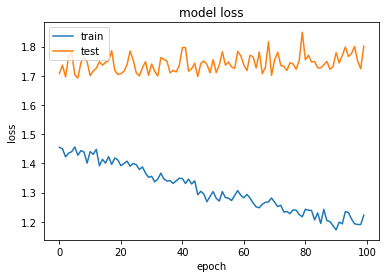

In [18]:
import matplotlib.pyplot as plt

# Model Summary

model.summary()

# PLT History info
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()